# Método de Runge-Kutta

Katlyn de Almeida Ribeiro

Julia Graziosi Ortiz

Matheus Araujo Pinheiro

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Objetivo: 
Obter método de Runge-Kutta de ordem 3 e aplicar em problema (abaixo), comparando resultado com solução exata.

#### Problema:
Resolver o PVI
$$  
\begin{equation*}
    \begin{cases}
        y' = y + 2x - 2 \\
        y(0) = 1
    \end{cases}
    ,\ \  x \in [0,0 \ ,\  1,0]
    ,\ \  h = 0,1
\end{equation*}
$$
    
#### Solução exata do problema:
$$  
\begin{equation*}
    y(x) = e^x - 2x, \ \ x \in [0\ ,\ 1]
\end{equation*}
$$

#### Métodos de Runge-Kutta
Para ordem 3:
$$
\begin{equation*}
    \begin{cases}
        a_2 = b_{21} \\
        a_3 = b_{31} + b{32} \\
        c_1 + c_2 + c_3 = 1 \\
        c_2a_2 + c_3a_3 = \frac{1}{2} \\
        c_3b_{32}a_2 = \frac{1}{6} \\
        c_2a_2^2 + c_3a_3^2 = \frac{1}{3}
    \end{cases}
    \ , \ \ \ \text{ se } a_2 = a_3 = \frac{2}{3}
    \text{ então } \ \ \
    \begin{cases}
        b_{21} = \frac{2}{3} \\
        c_1 = \frac{1}{4} \\
        c_2 = \frac{3 - 4c_3}{4} \\
        b_{31} = \frac{8c_3 - 3}{12c_3} \\
        b_{32} = \frac{1}{4c_3}
    \end{cases}
    , \ c_3 \not = 0
\end{equation*}
$$

Escolhendo $c_3 = 4$:

Variáveis fixas: a2 = a3 = b21 = 2/3 e c1 = 1/4

Variáveis em função de c3: 
c2 = (3 - 4*c3)/4

b31 = (8*c3 -3)/(12*c3)

b32 = 1/(4*c3)



In [2]:
# Definindo f_k = f(x_k,y_k)
def f(x,y):
    return y + 2*x - 2

# Definindo Runge-Kutta de ordem 3
def RK(x,y,h,c3):
    k1 = f(x,y)
    k2 = f(x + (2/3)*h , y + h*(2/3)*k1)
    k3 = f(x + (2/3)*h , y + h*((8*c3 -3)/(12*c3)*k1 + 1/(4*c3)*k2))
    return (1/4)*k1 + (3 - 4*c3)/4*k2 + c3*k3

# Solução exata
def exata(x):
    return np.exp(x) -2*x

In [3]:
# Resolvendo o PVI
h = 0.1
n = int(1/h) + 1  # n = 10
x = np.zeros(n)
y = np.ones(n)

c3 = 4

for i in range (1,n):
    x[i] = x[i-1] + h
    y[i] = y[i-1] + h*RK(x[i-1],y[i-1],h,c3)
    # calculando a exata nos pontos x
    ex = exata(x)

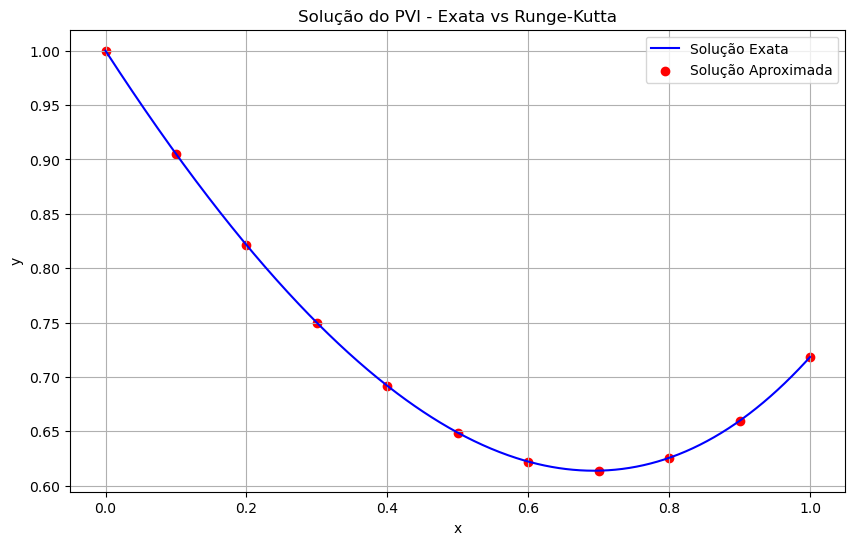

In [4]:
# Comparação gráfica dos resultados
x_plot = np.linspace(0, 1, 500)
y_plot = exata(x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='Solução Exata', color='blue')
plt.scatter(x, y, color='red', label='Solução Aproximada')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solução do PVI - Exata vs Runge-Kutta')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Erro cometido (absoluto)
erros_absolutos = np.abs(ex - y)

# Tabela comparando os resultados
data = {
    "x": x,
    "RK3": y,
    "Exata": ex,
    "Erro Absoluto": erros_absolutos,
}
df = pd.DataFrame(data)

pd.options.display.float_format = '{:.6f}'.format
print(df.to_string(index=False))

       x      RK3    Exata  Erro Absoluto
0.000000 1.000000 1.000000       0.000000
0.100000 0.905167 0.905171       0.000004
0.200000 0.821393 0.821403       0.000009
0.300000 0.749843 0.749859       0.000016
0.400000 0.691802 0.691825       0.000023
0.500000 0.648690 0.648721       0.000032
0.600000 0.622077 0.622119       0.000042
0.700000 0.613698 0.613753       0.000054
0.800000 0.625472 0.625541       0.000068
0.900000 0.659518 0.659603       0.000085
1.000000 0.718177 0.718282       0.000105


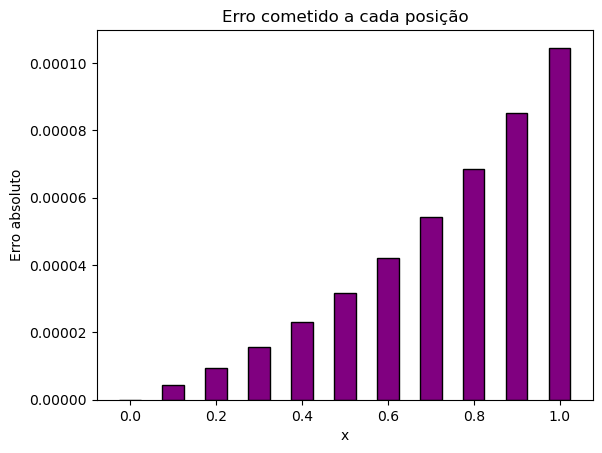

In [6]:
# Comparação gráfica dos erros
plt.bar(x,erros_absolutos, width=0.05, color = "purple", edgecolor = "black")
plt.xlabel('x')
plt.ylabel('Erro absoluto')
plt.title("Erro cometido a cada posição")
plt.show()